In [ ]:
import json
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome()

base_url = 'https://in.indeed.com/jobs?q=python+developer&l=India&start='

data_list = []

try:
    for start in range(10, 6540, 10):
        print(start)  # Assuming 9658 results, with 15 results per page
        url = f'{base_url}{start}'

        driver.get(url)

        # Wait for the page to load
        time.sleep(1) 

        
        page_source = driver.page_source

        soup = BeautifulSoup(page_source, 'html.parser')

        job_titles = [title.text for title in soup.find_all('span', {'title': True})]
        company_names = [company.text for company in soup.find_all('span', {'data-testid': 'company-name'})]
        job_locations = [loc.text for loc in soup.find_all('div', {'data-testid': 'text-location'})]
        salaries = [sal.text if sal.text else "Not specified" for sal in soup.find_all('div', class_='metadata salary-snippet-container')]

        # Append the data to the list
        for i in range(len(job_titles)):
            data = {
                "index": start + i,
                "Job Title": job_titles[i] if i < len(job_titles) else None,
                "Company Name": company_names[i] if i < len(company_names) else None,
                "Job Location": job_locations[i] if i < len(job_locations) else None,
                "Salary": salaries[i] if i < len(salaries) else None
            }
            data_list.append(data)

except Exception as e:
    print(f"An error occurred: {e}")

finally:
    driver.quit()

# Convert data list to JSON
json_data = json.dumps(data_list, indent=4)



In [82]:
import pandas as pd
df = pd.read_json(json_data)
#df.to_csv(r'C:\Users\prasad bolgss\Downloads\indeed.csv')

# Display the DataFrame


In [83]:
df['Job Location'].unique()

array(['Hybrid remote in Delhi, Delhi', 'New Delhi, Delhi',
       'Indore, Madhya Pradesh', 'Bengaluru, Karnataka', 'Remote',
       'Hyderabad, Telangana', None,
       'Hybrid remote in Bengaluru, Karnataka', 'Gurgaon, Haryana',
       'Jaipur, Rajasthan', 'Pune, Maharashtra', 'Kochi, Kerala',
       'Delhi, Delhi', 'India', 'Hybrid remote in Andhra Pradesh', 'Goa',
       'Calicut, Kerala', 'Chennai, Tamil Nadu', 'Remote in India',
       'Remote in Indore, Madhya Pradesh', 'Nagpur, Maharashtra',
       'Guwahati, Assam', 'Mumbai, Maharashtra',
       'Remote in Chennai, Tamil Nadu', 'Ahmedabad, Gujarat',
       'Noida, Uttar Pradesh', 'Thiruvananthapuram, Kerala',
       'Surat, Gujarat', 'Delhi', 'Visakhapatnam, Andhra Pradesh',
       'Jabalpur, Madhya Pradesh', 'Kolkata, West Bengal',
       'Gandhinagar, Gujarat', 'Coimbatore, Tamil Nadu',
       'Hybrid remote in Gurgaon, Haryana', 'Kerala',
       'Remote in Kharadi, Pune, Maharashtra', 'Mohali, Punjab',
       'Hybrid remot

In [86]:
import pandas as pd

# Replace 'df' with your DataFrame name and 'Job Location' with your column name
def split_city_state(row):
    location = row['Job Location']
    if location is None:
        return None, None
    location_list = location.split(",")
    if len(location_list) > 1:
        if len(location_list) == 3:
            city = location_list[1].strip()
            state = location_list[2].strip()
        elif 'remote' in location_list[0].lower():
            city = location_list[0].split("in")[-1].strip()
            state = location_list[1].strip()
        else:
            city = location_list[0].strip()
            state = location_list[1].strip()
    else:
        city = None
        state = location_list[0].strip()
    return city, state

# Applying the function to the DataFrame
df[['City', 'State']] = df.apply(split_city_state, axis=1, result_type='expand')

df


,index,Job Title,Company Name,Job Location,Salary,City,State
0,10,Database Developer,Codash Solutions,"Hybrid remote in Delhi, Delhi","₹60,000 - ₹70,000 a month",Delhi,Delhi
1,11,Python & ETL Developer,Virtusa,"New Delhi, Delhi","Up to ₹10,00,000 a year",New Delhi,Delhi
2,12,Python Developer,edutinker,"Indore, Madhya Pradesh","From ₹45,000 a month",Indore,Madhya Pradesh
3,13,Software Developer,Technosoft Solutions,"Bengaluru, Karnataka","₹7,000 - ₹9,000 a month",Bengaluru,Karnataka
4,14,Python Developer Intern,Igsrs,Remote,"₹22,000 a month",None,Remote
...,...,...,...,...,...,...,...
9769,6540,"Sr. Python Developer- GCP, AWS,",TeamPlus Staffing Solution Pvt Ltd,"Bengaluru, Karnataka",None,Bengaluru,Karnataka
9770,6541,Member of Technical Staff - 4 [Backend Develop...,Nutanix,"Ahmedabad, Gujarat",None,Ahmedabad,Gujarat
9771,6542,Python developer Job,AxisTechnoLab,"Pune, Maharashtra",None,Pune,Maharashtra
9772,6543,Python Full Stack Engineer- AVP,Deutsche Bank,"Rajkot, Gujarat",None,Rajkot,Gujarat


In [93]:
df['State'].value_counts()

Maharashtra                        1422
Karnataka                           989
Uttar Pradesh                       911
Telangana                           864
Delhi                               660
Tamil Nadu                          524
Kerala                              479
Remote                              286
Gujarat                             275
Haryana                             266
Madhya Pradesh                      160
West Bengal                         108
India                               107
Orissa                              100
Rajasthan                            34
Remote in India                       8
Punjab                                6
Andhra Pradesh                        3
Goa                                   3
Hybrid remote in Andhra Pradesh       3
Assam                                 1
Remote in Kerala                      1
Remote in Haryana                     1
Jharkhand                             1
Uttarakhand                           1


In [96]:
df['Salary'].unique()

array(['₹60,000 - ₹70,000 a month', 'Up to ₹10,00,000 a year',
       'From ₹45,000 a month', '₹7,000 - ₹9,000 a month',
       '₹22,000 a month', 'From ₹30,000 a month',
       '₹3,60,000 - ₹4,00,000 a year', '₹500 - ₹1,500 a day',
       '₹19,00,000 a year', '₹21,000 - ₹32,000 a month', None,
       '₹3,60,000 - ₹4,80,000 a year', '₹20,000 - ₹60,000 a month',
       '₹6,00,000 - ₹15,00,000 a year', 'From ₹2,50,000 a year',
       '₹3,00,000 - ₹6,00,000 a year', '₹3,00,000 - ₹5,00,000 a year',
       '₹12,00,000 - ₹18,00,000 a year', '₹20,000 - ₹47,442 a month',
       '₹15,000 - ₹35,000 a month', 'Up to ₹55,000 a month',
       '₹700 - ₹900 an hour', 'Up to ₹9,00,000 a year',
       '₹2,76,216 - ₹13,67,898 a year', '₹20,000 - ₹50,000 a month',
       '₹9,000 - ₹18,000 a month', '₹28,00,000 a year', '₹12,000 a month',
       '₹3,80,230 - ₹8,00,000 a year', '₹42,000 - ₹75,000 a month',
       '₹1,500 a month', '₹50 - ₹65 an hour',
       '₹3,72,970 - ₹15,85,857 a year', '₹3,00,000 - ₹4

In [138]:
import pandas as pd
import re

# Replace 'df' with your DataFrame name and 'Salary' with your column name
def extract_salary(row):
    salary_string = row['Salary']
    if salary_string is None:
        return None, None

    min_salary = None
    max_salary = None

    if 'year' in salary_string:
        split_string = salary_string.split(' - ')
        if len(split_string) == 2:
            min_salary_match = re.search(r'₹(\d[\d,]*(?:\.\d+)?)', split_string[0])
            max_salary_match = re.search(r'₹(\d[\d,]*(?:\.\d+)?)', split_string[1])
            if min_salary_match:
                min_salary = int(min_salary_match.group(1).replace(',', ''))
            if max_salary_match:
                max_salary = int(max_salary_match.group(1).replace(',', ''))
        elif '-' not in salary_string:
            max_salary_match = re.search(r'₹(\d[\d,]*(?:\.\d+)?)', salary_string)
            if max_salary_match:
                max_salary = int(max_salary_match.group(1).replace(',', ''))
    elif 'month' in salary_string:
        split_string = salary_string.split(' - ')
        if len(split_string) == 2:
            min_salary_match = re.search(r'From ₹(\d[\d,]*(?:\.\d+)?)', split_string[0])
            max_salary_match = re.search(r'₹(\d[\d,]*(?:\.\d+)?)', split_string[1])
            if min_salary_match:
                min_salary = int(min_salary_match.group(1).replace(',', '')) * 12
            if max_salary_match:
                max_salary = int(max_salary_match.group(1).replace(',', '')) * 12
        elif '-' not in salary_string:
            max_salary_match = re.search(r'₹(\d[\d,]*(?:\.\d+)?)', salary_string)
            if max_salary_match:
                max_salary = int(max_salary_match.group(1).replace(',', ''))

    elif 'day' in salary_string:
        min_salary_match = re.search(r'₹(\d[\d,]*(?:\.\d+)?)', salary_string)
        if min_salary_match:
            min_salary = int(min_salary_match.group(1).replace(',', ''))
        max_salary = min_salary  
    elif 'hour' in salary_string:
        min_salary_match = re.search(r'₹(\d[\d,]*(?:\.\d+)?)', salary_string)
        if min_salary_match:
            min_salary = float(min_salary_match.group(1).replace(',', ''))
        max_salary = min_salary  

    return min_salary, max_salary

df[['Min Salary', 'Max Salary']] = df.apply(extract_salary, axis=1, result_type='expand')



In [139]:
pd.options.display.float_format = '{:.2f}'.format


In [140]:
df1=df[~(df['Max Salary'].isnull())]


<Figure size 2200x400 with 0 Axes>

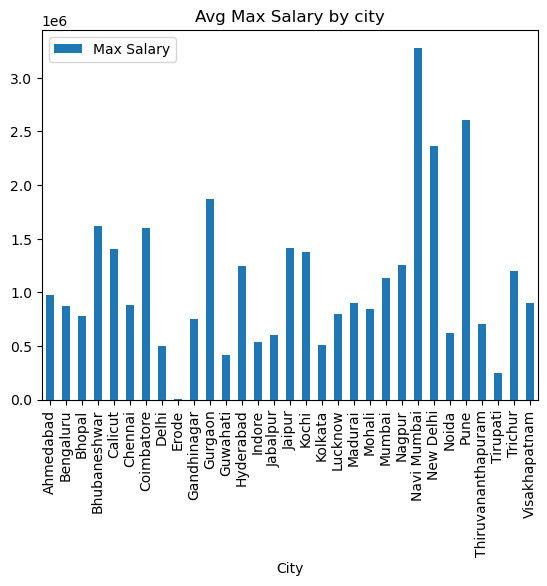

In [143]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,4))
df1[['Max Salary','City']].groupby('City').mean().plot(kind='bar')
plt.title("Avg Max Salary by city")
plt.show()

In [ ]:
df2=df[~(df['Min Salary'].isnull())]


<Figure size 2200x400 with 0 Axes>

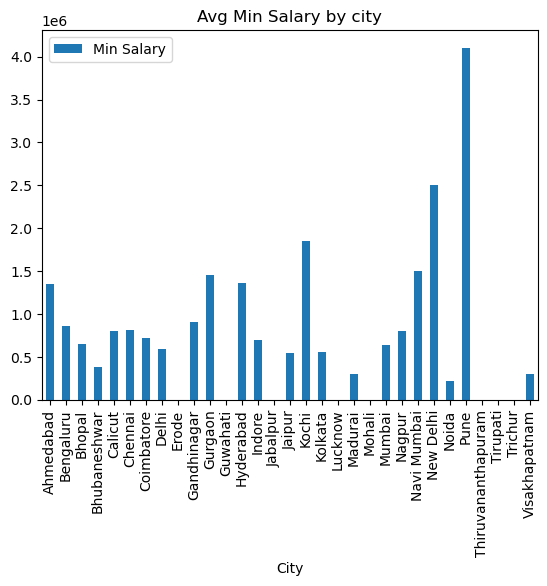

In [144]:
plt.figure(figsize=(22,4))
df1[['Min Salary','City']].groupby('City').mean().plot(kind='bar')
plt.title("Avg Min Salary by city")
plt.show()